Lab 2 PHYS265 : Mine Crafting


By: Madeline Springer

In [21]:
## Introduction
# Constants 
G = 6.6743 * 10**-11 #m^2/kg/s^2
g0 = 9.81 #m/s^2
Me = 5.972 * 10**24 #kg 
Mm = 7.35 * 10**22 #kg
Re = 6378.1e3 #m 
Rm = 1738.1e3 #m 
Er = 7.272 * 10**-5 #rad/s 

import numpy as np 
import matplotlib.pyplot as plt 
import scipy
from scipy.integrate import solve_ivp 
from scipy.integrate import quad

In [22]:
## Part 1: The Ideal Case
#1 -> x = v0*t + 0.5 * a * t**2 + x0
x0 = 0 
v0 = 0
x = 4000
a = g0 
t = np.sqrt(x/(0.5*a))
print(f'It takes {t} seconds for the mass to reach the bottom.')

It takes 28.55686245854129 seconds for the mass to reach the bottom.


In [23]:
#2 -> #gam = gamma, #alp = alpha
def Q1(t, e): 
    alp = 0
    gam = 2 
    y, v = e
    dydt = v 
    dvdt = -g0+alp*v**gam
    return[dydt, dvdt] 

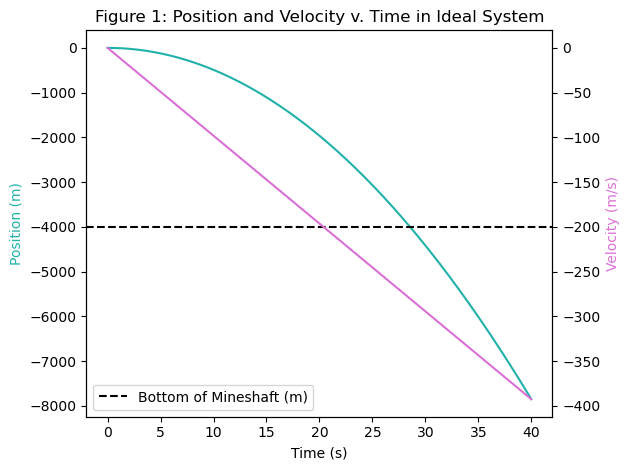

In [24]:
#3 -> 
t0, tf = 0, 40 
t_eval = np.linspace(t0, tf, 1000) 

y0 = 0 
v0 = 0 
ic = [y0, v0]

alp = 0 
sol = solve_ivp(Q1, (t0, tf), y0=ic, t_eval = t_eval)

pos = sol.y[0] 
vel = sol.y[1] 
t_vals = sol.t 

fig, ax1 = plt.subplots() 
ax1.plot(t_vals, pos, color = 'lightseagreen') 
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Position (m)", color = 'lightseagreen')
ax2 = ax1.twinx() 
ax2.plot(t_vals, vel, color = 'orchid') 
ax2.set_ylabel("Velocity (m/s)", color = 'orchid')
ax1.axhline(y = -4000, color = 'black', ls = '--', label = 'Bottom of Mineshaft (m)')
plt.title("Figure 1: Position and Velocity v. Time in Ideal System")

ax1.legend(loc = 'lower left')
fig.tight_layout()

In [25]:
#4 -> 
t_analytic = np.sqrt((2*x)/g0)
print(f'Analytic Time: {t_analytic}')

def bottom(t, y):
    return y[0] + 4000 
sol = solve_ivp(Q1, (0,100), [0,0], events = bottom)
fall_time = sol.t_events[0][0] 
print(f'Solve_ivp Time: {fall_time}')

Analytic Time: 28.55686245854129
Solve_ivp Time: 28.556862458541275


My analytic calculation found t = 28.55686245854129s based on the formula t = sqrt(2h/g) which assumes ideal conditions and gives an exact solution based on them. Solve_ivp found that t = 28.556862458541275s which is slightly shorter. While the numbers are extremely close, they are not the same. This error may originate from the approximations in the solver which are very accurate but not exact, introducing minor error. Also, the resolution of the t_eval grid which contains 1000 points over 100 seconds limits the precision of our event detection. However, this small discrepancy is usually acceptable and expected.

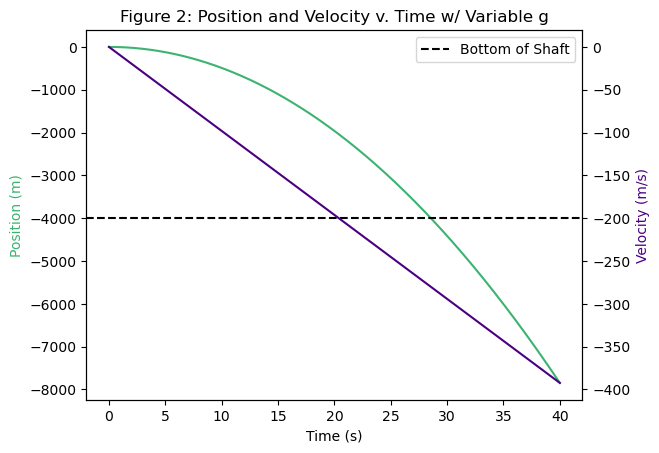

In [26]:
## Part 2: Including Drag and a Variable g
#1 -> 
def g(r): 
    return g0 * (r/Re)
    
gam = 2
alp = 0

def Q2(t, e): 
    y, v = e
    dydt = v
    dvdt = -g(y)+alp*v**gam
    return [dydt, dvdt] 

y0 = Re 
v0 = 0 
ic = [y0, v0]

t0, tf = 0, 40
t_eval = np.linspace(t0, tf, 1000)

sol = solve_ivp(Q2, (t0, tf), ic, t_eval = t_eval)

y = sol.y[0] 
v = sol.y[1] 
t = sol.t

fig, ax1 = plt.subplots() 
ax1.set_xlabel("Time (s)") 
ax1.set_ylabel("Position (m)", color = 'mediumseagreen') 
ax1.plot(t_vals, pos, color = 'mediumseagreen')
ax2 = ax1.twinx() 
ax2.set_ylabel("Velocity (m/s)", color = 'indigo')
ax2.plot(t_vals, vel, color = 'indigo', label = "Velocity")
ax1.axhline(y = -4000, color = 'black', ls = '--', label = 'Bottom of Shaft')
plt.title("Figure 2: Position and Velocity v. Time w/ Variable g")
ax1.legend();

#2 -> What effect does incorporating a height-dependent g have on the fall time?

Incorporating a height-dependent g influences the fall time by making the object accelerate slower near the bottom and therefore increasing the time. However, the fall time changes by very little when we use a height dependent y. With variable gravity, the gravitational pull becomes weaker as the object goes deeper inside Earth's core and this causes less acceleration. It takes more time to reach the bottom of the shaft, but for a 4000m fall, the effect is relatively small. 4000m compared to Earth's radius of 6378.1km is miniscule. Still, it's good to try and model reality as accurately as possible. 

Alpha is equal to 0.003924 s/m^2.


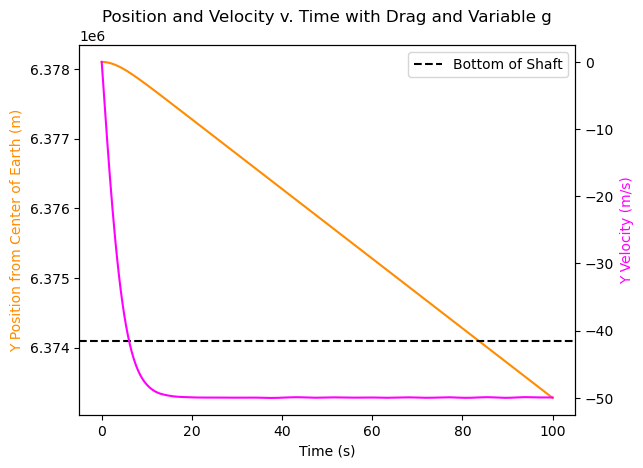

In [27]:
#3 ->
v_term = 50 
alp = g0/v_term**2
print(f'Alpha is equal to {alp} s/m^2.')
t0, tf = 0, 100
t_eval = np.linspace(t0, tf, 500)
sol = solve_ivp(Q2, (t0, tf), ic, t_eval = t_eval)

y = sol.y[0] 
v = sol.y[1] 
t = sol.t

fig,ax1 = plt.subplots()
ax1.plot(t,sol.y[0], color = 'darkorange')
ax2=ax1.twinx()
ax2.plot(t, v,label='Velocity', color = 'magenta')
ax1.axhline(y = Re-4000, color='black', ls='--',label = 'Bottom of Shaft')
ax1.set_title('Position and Velocity v. Time with Drag and Variable g')
ax1.set_ylabel('Y Position from Center of Earth (m)', color = 'darkorange')
ax2.set_ylabel('Y Velocity (m/s)', color = 'magenta') 
ax1.set_xlabel('Time (s)')
ax1.legend();

Here I have included drag in my calculations of position and velocity. Now, velocity is decreasing and negative at t = 0s, but it begins to shift to a constant value at around -50 m/s. This is the point at which the drag and gravity forces become equal and terminal velocity comes into play. The position appears to decrease exponentially for small t and then becomes more linear over time until about 15 seconds when it fully makes the transition to linear, aligning with our analysis of the velocity.

In [28]:
stop = Re - 4000
def eventstop(t, m):
    y,v = m
    return y - stop

eventstop.terminal = True
sol = solve_ivp(fun = Q2,
                          t_span = (t0,tf), 
                          y0 = ic,
                                 t_eval = t_eval, events = eventstop
                                )
t_event = sol.t_events[0][0]
print(f'The object hits the bottom at {t_event} seconds when we take into account variable g and drag.')

The object hits the bottom at 83.54308278260291 seconds when we take into account variable g and drag.


In [29]:
## Part 3: The Coriolis Force

#1: To account for the Coriolis Force, we have to consider more than just the y-direction. We should also include velocity and position in the transverse direction (x-direction). The z-direction is not affected by the Coriolis force so we can disregard it.

The equation for the Coriolis Effect is $\vec{F_c} = -2 m (\vec{\Omega} x \vec{v})$ with $\Omega$ as the Earth's rotation, $m$ as the mass, and $\vec{v}$ as the velocity vector. 

Next, we use that equation to calculate the x and y components of the Coriolis Force where $\vec{F_{cx}} = +2 m \Omega  \vec{v_y}$ and $\vec{F_{cy}} = -2 m \Omega \vec{v_x}$.

Because $F=ma$, we can use these equations to find the acceleration it causes in the x and y directions with $\vec{a_{cx}} = +2 \Omega  \vec{v_y}$ and $\vec{a_{cy}} = -2 \Omega \vec{v_x}$.

In [30]:
alp = 0
def Q3(t,r_vector):
    x, y, vx, vy = r_vector
    dxdt = vx
    dydt = vy
    dvxdt = 2 * Er * vy
    dvydt = -g(y) + alp * vy ** gam - 2 * Er * vx
    return dxdt, dydt, dvxdt, dvydt

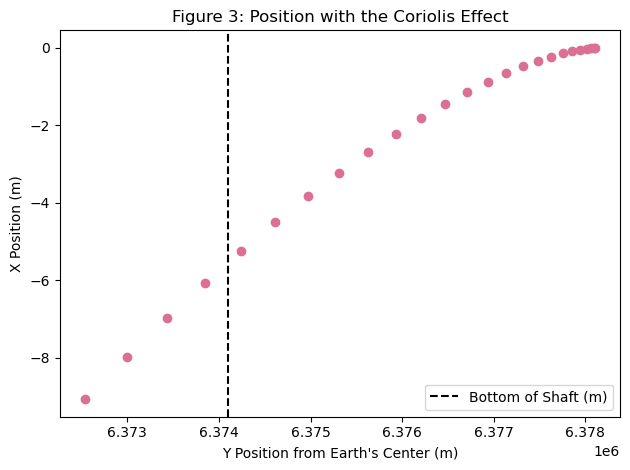

In [31]:
#2 -> 
alp = 0
t0, tf = 0, 35
t_eval = np.linspace(t0, tf, 500) 

x0 = 0 
y0 = Re 
vy0 = 0
vx0 = 0 
ic = [x0, y0, vx0, vy0]

eventstop.terminal = False
sol = solve_ivp(fun = Q3, t_span = (t0,tf), y0 = ic, t_eval = t_eval)

x = sol.y[0]
y = sol.y[1]
vx = sol.y[2]
vy = sol.y[3]
t_vals = sol.t

fig, ax1 = plt.subplots()
ax1.scatter(y[::20], x[::20], color = 'palevioletred')
ax1.axvline(x= Re - 4000, ls = '--', color = 'black', label = 'Bottom of Shaft (m)')
ax1.set_title('Figure 3: Position with the Coriolis Effect')
ax1.set_ylabel('X Position (m)')
ax1.set_xlabel("Y Position from Earth's Center (m)");
ax1.legend()
fig.tight_layout()

Figure 3 graphs the x and y positions of an object falling beneath the Earth's surface and inside of the mineshaft. As the y position increases and the object falls further down into the mineshaft, the x position (relative to the initial x value) falls at an increasing rate. We can see the data points get farther apart as the distance from Earth's center decreases and the mass falls.

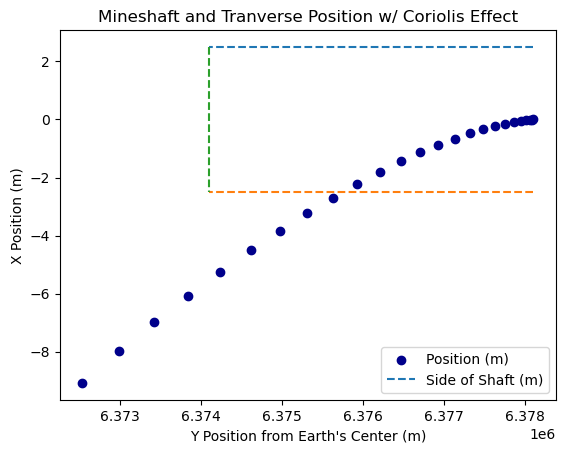

In [32]:
#3 -> 

fig,ax = plt.subplots()
ax.scatter(y[::20],x[::20],label = 'Position (m)', color = 'darkblue')
ax.set_title('Mineshaft and Tranverse Position w/ Coriolis Effect')
ax.set_ylabel('X Position (m)')
ax.set_xlabel("Y Position from Earth's Center (m)")

ax.plot([Re, Re-4000] ,[2.5,2.5] ,ls = '--',label= 'Side of Shaft (m)')
ax.plot([Re, Re-4000] ,[-2.5,-2.5] ,ls = '--')
ax.plot([Re-4000, Re-4000] ,[2.5,-2.5] ,ls = '--')
ax.legend(loc= 'lower right');

The graph above shows that the mass will hit the side of the mineshaft before it reaches the bottom of a 4000m deep and 5m wide mineshaft. 

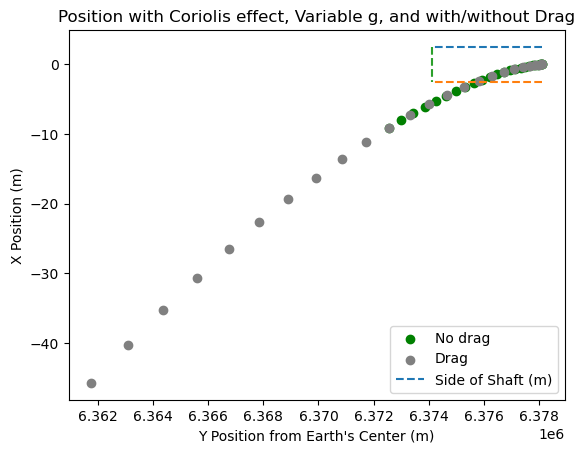

In [55]:
#4 ->
alp = 0
t0,tf = 0, 60
t_eval = np.linspace(t0, tf, 500)

x0 = 0
y0 = Re
vy0 = 0 
vx0 = 0
ic = [x0, y0, vx0, vy0]

sol = solve_ivp(fun = Q3,t_span = (t0, tf), y0 = ic, t_eval = t_eval)

x2 = sol.y[0]
y2 = sol.y[1]
vx2 = sol.y[2]
vy2 = sol.y[3]
time2 = sol.t

fig, ax2 = plt.subplots()
ax2.scatter(y[::20], x[::20],label = 'No drag', color = 'green')
ax2.scatter(y2[::20], x2[::20], label='Drag', color = 'gray')

ax2.plot([Re, Re - 4000], [2.5,2.5], ls='--',label = 'Side of Shaft (m)')
ax2.plot([Re, Re - 4000], [-2.5,-2.5], ls='--')
ax2.plot([Re - 4000, Re - 4000], [2.5,-2.5], ls='--')

ax2.set_title('Position with Coriolis effect, Variable g, and with/without Drag')
ax2.set_ylabel('X Position (m)')
ax2.set_xlabel("Y Position from Earth's Center (m)")
ax2.legend();
ax2.legend(loc='lower right')

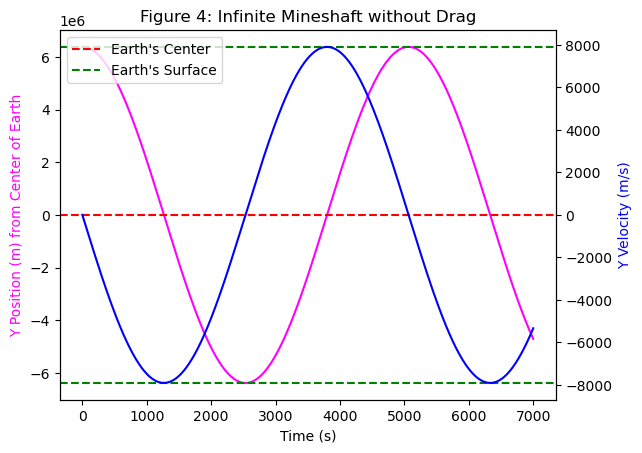

In [34]:
## Part 4: An Infinitely Deep Mine
alp = 0
def g(y):
    gr = g0 * (y) / Re
    return gr
def Q4(t, e):
    y,v = e
    dydt = v
    dvdt = -g(y) + alp * v ** gam
    return [dydt, dvdt]

t0, tf = 0, 7000
t_eval = np.linspace(t0, tf, 10000) 

y0 = Re
v0 = 0
ic = [y0,v0]

def stopping(t, e):
    y, v = e
    return y + Re 

stopping.terminal = True 
stopping.direction = -1  

sol = solve_ivp(fun = Q4, t_span=(t0, tf), y0 = ic, t_eval = t_eval, events = stopping)

y3 = sol.y[0]
v3 = sol.y[1]
time3 = sol.t

fig, ax1 = plt.subplots()
ax1.plot(time3, y3, color = 'magenta')
ax1.set_ylim(-1.1 * Re, 1.1 * Re)  
ax1.axhline(y = 0, ls ='--', color = 'red', label = "Earth's Center") 
ax1.axhline(y = Re, ls ='--', color = 'green', label = "Earth's Surface") 
ax1.axhline(y = -Re, ls ='--', color = 'green') 
ax2 = ax1.twinx()
ax2.plot(time3, v3, label = 'Velocity', color = 'blue')
ax2.set_ylabel('Y Velocity (m/s)', color = 'blue')

ax1.set_title('Figure 4: Infinite Mineshaft without Drag')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Y Position (m) from Center of Earth', color='magenta');
ax1.legend()
ax1.legend(loc='upper left')

Here the position curve is a cosine curve, demonstrating simple harmonic motion. The velocity curve is a sine curve, indicating the velocity is zero at the maximum displacement and maximum at the center of Earth. Because there is no drag, there is no energy loss so the amplitude and peak velocity stay constant over time. This graph tells us that for an infinite mineshaft, the object will oscillate from one side of Earth to the other forever. 

In [35]:
#2 -> 
def eventstop(t, e):
    y,v = e
    return v

eventstop.terminal=False
sol = solve_ivp(fun = Q4,
                          t_span = (t0,tf),
                          y0 = ic,
                                 t_eval = t_eval, events = eventstop
                                )
t_otherside = sol.t_events[0][1]
print(f'When we include variable gravity, it takes the object {t_otherside} seconds to reach the other side.')


When we include variable gravity, it takes the object 2532.6120147256643 seconds to reach the other side.


In [36]:
stop = 0

def eventstop(t, e):
    y,v = e
    return y

eventstop.terminal = True
sol = solve_ivp(fun = Q4,
                          t_span = (t0,tf),
                          y0 = ic, 
                                 t_eval = t_eval, events = eventstop
                                )

t_center = sol.t_events[0][0]
t_center_v = sol.y_events[0][0][1]

print(f'When considering variable g, it takes {t_center} seconds to reach the center of Earth, and has a speed of {np.abs(t_center_v)} m/s downwards as it does.')


When considering variable g, it takes 1266.4734695588031 seconds to reach the center of Earth, and has a speed of 7910.759872777071 m/s downwards as it does.


In [37]:
#3 -> 
v_orbit = np.sqrt(G * Me/ Re)
print(f'The orbital speed is {v_orbit} m/s which is nearly identical to  the "crossing-time" velocity or the velocity of the mass  at the center of Earth ({np.abs(t_center_v)} m/s). The difference between the two is around 5 m/s which is miniscule when their values are in the thousands.')

The orbital speed is 7905.277129890415 m/s which is nearly identical to  the "crossing-time" velocity or the velocity of the mass  at the center of Earth (7910.759872777071 m/s). The difference between the two is around 5 m/s which is miniscule when their values are in the thousands.


In [43]:
t_orbit = np.pi * 2 * Re / v_orbit
print(f'The orbital period is {t_orbit} and the crossing-time is {t_center}. If you multiply the crossing-time by four, you get {4*t_center} seconds which shows that it is about a quarter of the orbital period.')

The orbital period is 5069.371199675785 and the crossing-time is 1266.4734695588031. If you multiply the crossing-time by four, you get 5065.8938782352125 seconds which shows that it is about a quarter of the orbital period.


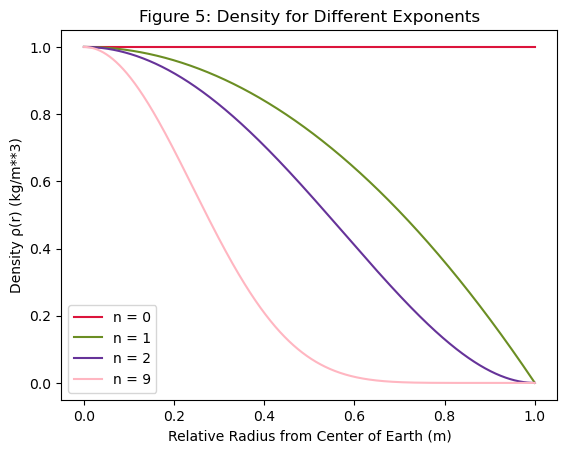

In [76]:
## Part 5: A Non-Uniform Earth
#1 ->

def p(r,n):
    pr = 1 * (1 - r ** 2) ** n
    return pr

fig, ax = plt.subplots()
r_data = np.linspace(0, 1, 1000)
p0 = p(r_data, 0)
p1 = p(r_data, 1)
p2 = p(r_data, 2)
p9 = p(r_data, 9)
ax.plot(r_data, p0, label = 'n = 0', color = 'crimson')
ax.plot(r_data, p1,label = 'n = 1', color = 'olivedrab')
ax.plot(r_data, p2,label = 'n = 2', color = 'rebeccapurple')
ax.plot(r_data, p9, label = 'n = 9', color = 'lightpink')

ax.set_title('Figure 5: Density for Different Exponents')
ax.set_ylabel('Density ρ(r) (kg/m**3)')
ax.set_xlabel('Relative Radius from Center of Earth (m)')
ax.legend();

5494.8674095512 13737.168523878001 24040.044916786497 135545.12141863425


/var/folders/f4/ddd_wctx70x2xw4_kqtcr25w0000gn/T/ipykernel_62195/4171580587.py:10: RuntimeWarning: invalid value encountered in scalar divide
  F = G * M / y**2
/var/folders/f4/ddd_wctx70x2xw4_kqtcr25w0000gn/T/ipykernel_62195/4171580587.py:15: RuntimeWarning: invalid value encountered in scalar divide
  F = G * M / y**2
/var/folders/f4/ddd_wctx70x2xw4_kqtcr25w0000gn/T/ipykernel_62195/4171580587.py:20: RuntimeWarning: invalid value encountered in scalar divide
  F = G * M / y**2
/var/folders/f4/ddd_wctx70x2xw4_kqtcr25w0000gn/T/ipykernel_62195/4171580587.py:25: RuntimeWarning: invalid value encountered in scalar divide
  F = G * M / y**2


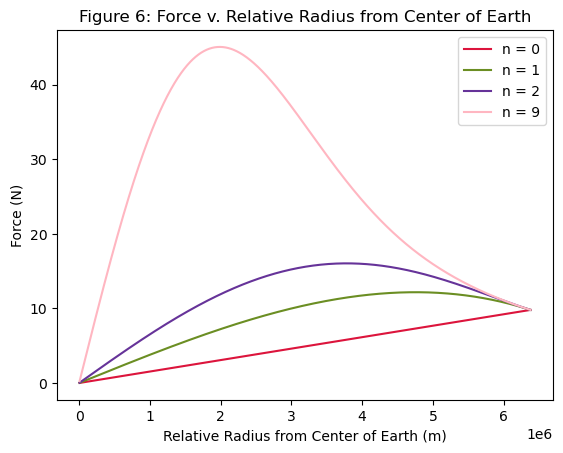

In [81]:
#2 ->
p_0 = Me / (4 * np.pi * scipy.integrate.quad(lambda y: p(y / Re, 0) * y**2, 0, Re)[0])
p_1 = Me / (4 * np.pi * scipy.integrate.quad(lambda y: p(y / Re, 1) * y**2, 0, Re)[0])
p_2 = Me / (4 * np.pi * scipy.integrate.quad(lambda y: p(y / Re, 2) * y**2, 0, Re)[0])
p_9 = Me / (4 * np.pi * scipy.integrate.quad(lambda y: p(y / Re, 9) * y**2, 0, Re)[0])
print(p_0, p_1, p_2, p_9)
 
def f_0(y):
    M = 4 * np.pi * p_0 * scipy.integrate.quad(lambda r: p(r / Re, 0) * r**2, 0, y)[0]
    F = G * M / y**2
    return F

def f_1(y):
    M = 4 * np.pi * p_1 * scipy.integrate.quad(lambda r: p(r / Re, 1) * r**2, 0, y)[0]
    F = G * M / y**2
    return F

def f_2(y):
    M = 4 * np.pi * p_2 * scipy.integrate.quad(lambda r: p(r / Re, 2) * r**2, 0, y)[0]
    F = G * M / y**2
    return F

def f_9(y):
    M = 4 * np.pi * p_9 * scipy.integrate.quad(lambda r: p(r / Re, 9) * r**2, 0, y)[0]
    F = G * M / y**2
    return F

    
p_data = np.linspace(0, Re, 1000)
f0_data =[f_0(y) for y in p_data]
f1_data = [f_1(y) for y in p_data]
f2_data = [f_2(y) for y in p_data]
f9_data = [f_9(y) for y in p_data]

fig, ax = plt.subplots()
ax.plot(p_data,f0_data,label = 'n = 0', color = 'crimson')
ax.plot(p_data,f1_data,label = 'n = 1', color = 'olivedrab')
ax.plot(p_data,f2_data,label = 'n = 2', color = 'rebeccapurple')
ax.plot(p_data,f9_data,label = 'n = 9', color = 'lightpink')

ax.set_title('Figure 6: Force v. Relative Radius from Center of Earth')
ax.set_xlabel('Relative Radius from Center of Earth (m)')
ax.set_ylabel('Force (N)')
ax.legend()

In [86]:
#3 -> 
alp = 0
m = 2
y0 = Re
v0 = 0 
ic = [y0,v0]
t0,tf = 0, 10000
t_eval = np.linspace(t0, tf, 100000)

def Q5(t, m):
    y, v = m
    dydt = v
    dvdt = -f_0(y)-alp*v**m
    return[dydt,dvdt]
    
sol = solve_ivp(fun=Q5, t_span = (t0,tf), y0 = ic, t_eval = t_eval)
pos_0 = sol.y[0]
vel_0 = sol.y[1]
t_0 = sol.t

fig, ax6 = plt.subplots()
ax6.plot(t_0, pos_0, label = 'Position', color = 'lightorange')
ax7 = ax6.twinx()
ax7.plot(t_vals0, vel_0, label = 'Velocity', color = 'mediumspringgreen')
ax6.axhline(y = Re - 4000, color='black', ls = '--', label = 'Bottom of Shaft (m)')
ax7.set_title('Figure 7: Position v. Velocity for n = 0')
ax6.set_xlabel('Time (s)')
ax6.set_ylabel('Position (m)', color = 'lightorange')
ax7.set_ylabel('Velocity (m/s)', color = 'mediumspringgreen')
ax6.legend(loc = 'lower right')

def Q51(t,m):
    y,v = m
    dydt = v
    dvdt = -f_1(y)-alp*v**m
    return[dydt,dvdt]
    
sol = solve_ivp(fun = Q51, t_span = (t0,tf), y0 = ic, t_eval = t_eval)
pos_1 = sol.y[0]
vel_1 = sol.y[1]
t_1 = sol.t

fig, ax61 = plt.subplots()
ax61.plot(t_1, pos_1, label = 'Position', color = 'lightorange')
ax71 = ax61.twinx()
ax71.plot(t_1, vel_1, label = 'Velocity', color = 'mediumspringgreen')
ax61.axhline(y = Re - 4000, color = 'black', ls = '--', label = 'Bottom of Shaft (m)')
ax71.set_title('Figure 7: Position v. Velocity for n = 1')
ax61.set_xlabel('Time (s)')
ax61.set_ylabel('Position (m)', color = 'lightorange')
ax71.set_ylabel('Velocity (m/s)',color = 'mediumspringgreen')
ax61.legend(loc = 'lower right')


def Q52(t,m):
    y,v = m
    dydt = v
    dvdt = -f_2(y)-alp*v**m
    return[dydt,dvdt]
    
sol = solve_ivp(fun = Q52, t_span = (t0,tf), y0 = ic, t_eval = t_eval)
pos_2 = sol.y[0]
vel_2 = sol.y[1]
t_2 = sol.t

fig, ax62 = plt.subplots()
ax62.plot(t_2, pos_2, label = 'Position', color = 'lightorange')
ax72 = ax62.twinx()
ax72.plot(t_2, vel_2, label = 'Velocity', color = 'mediumspringgreen')
ax62.axhline(y = Re - 4000, color = 'black', ls = '--', label = 'Bottom of Shaft (m)')
ax72.set_title('Figure 7: Position v. Velocity for n = 2')
ax62.set_xlabel('Time (s)')
ax62.set_ylabel('Position (m)', color = 'lightorange')
ax72.set_ylabel('Velocity (m/s)',color = 'mediumspringgreen')
ax62.legend(loc = 'lower right')


def Q59(t,m):
    y,v = m
    dydt = v
    dvdt = -f_9(y)-alp*v**m
    return[dydt,dvdt]
    
sol = solve_ivp(fun = Q59, t_span = (t0,tf), y0 = ic, t_eval = t_eval)
pos_9 = sol.y[0]
vel_9 = sol.y[1]
t_9 = sol.t

fig, ax62 = plt.subplots()
ax69.plot(t_9, pos_9, label = 'Position', color = 'lightorange')
ax79 = ax62.twinx()
ax79.plot(t_9, vel_9, label = 'Velocity', color = 'mediumspringgreen')
ax69.axhline(y = Re - 4000, color = 'black', ls = '--', label = 'Bottom of Shaft (m)')
ax79.set_title('Figure 7: Position v. Velocity for n = 9')
ax69.set_xlabel('Time (s)')
ax69.set_ylabel('Position (m)', color = 'lightorange')
ax79.set_ylabel('Velocity (m/s)',color = 'mediumspringgreen')
ax69.legend(loc = 'lower right')

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [84]:
#4 ->
stop = 0
def stopping(t, m):
    y,v = m
    return y
stopping.terminal = True

sol60 = solve_ivp(fun = Q5, t_span = (t0, tf), y0 = ic, t_eval = t_eval, events = stopping)
t_center_t0 = sol60.t_events[0][0]
t_center_v0 = sol60.y_events[0][0][1]
v0_center = np.abs(t_center_v0)

sol61 = solve_ivp(fun = Q51, t_span = (t0, tf), y0 = ic, t_eval = t_eval, events = stopping)
t_center_t1 = sol60.t_events[0][0]
t_center_v1 = sol60.y_events[0][0][1]
v1_center = np.abs(t_center_v1)

sol62 = solve_ivp(fun = Q52, t_span = (t0, tf), y0 = ic, t_eval = t_eval, events = stopping)
t_center_t2 = sol62.t_events[0][0]
t_center_v2 = sol62.y_events[0][0][1]
v2_center = np.abs(t_center_v2)

sol69 = solve_ivp(fun = Q59, t_span = (t0, tf), y0 = ic, t_eval = t_eval, events = stopping)
t_center_t9 = sol69.t_events[0][0]
t_center_v9 = sol69.y_events[0][0][1]
v9_center = np.abs(t_center_v9)

print(f'For density n=0, the object will reach the center of the Earth at {t_center_t0} seconds and with a speed of {v0_center} m/s downwards. \n\nFor density n=1, the object will reach the center of the Earth at {t_center_t1} seconds and with a speed of {v1_center} m/s downwards. \n\nFor density n=2, the object will reach the center of the Earth at {t_center_t2} seconds and with a speed of {v2_center} m/s downwards.\n\nFor density n=9, the object will reach the center of the Earth at {t_center_t9} seconds and with a speed of {v9_center} m/s downwards. ')


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [75]:
## Part 6: A Lunar Mineshaft 
#1 -> 
gm_surf = G * Mm / Rm ** 2

def Q6(t, m):
    y,v = m
    dydt = v
    dvdt = -gm_surf * y / Rm
    return[dydt,dvdt]
    
t0, tf = 0, 10000
t_eval = np.linspace(t0, tf, 100000)

y0 = Re
v0 = 0 
ic = [y0,v0]

stop = 0
def stopping(t,m):
    y,v = m
    return y
stopping.terminal=False

sol = solve_ivp(fun = Q6,t_span = (t0,tf), y0 = ic, t_eval = t_eval, events = stopping)
t_center_moon_t = sol.t_events[0][0]

print(f'At {t_center_moon_t} seconds, the object will reach the center of the moon.')

At 1625.0387070116076 seconds, the object will reach the center of the moon.


In [54]:
#2 ->
evol = 4/3*np.pi*Re**3
mvol = 4/3*np.pi*Rm**3
eden = Me/evol
mden = Mm/mvol
print(f'The moon is less dense than Earth because the density of the moon is {mden} kg/m^3 and the density of the Earth is {eden} kg/m^3.')


The moon is less dense than Earth because the density of the moon is 3341.753803870318 kg/m^3 and the density of the Earth is 5494.867409551201 kg/m^3.


#3 -> 
As seen earlier, the fall time (1266.4734695588031) is approximately a fourth of the orbital period (5069.371199675785). When we examine the equation for orbital period, we can see that it is dependent on mass. 

$$
T_{\text{orbit}} = 2\pi \sqrt{\frac{R^3}{GM}}
$$

To relate mass to density (mass/volume), we can use the following equation.

$$
M = \rho \cdot \frac{4}{3} \pi R^3
$$

So, when we substitute that equation in for mass in the orbital period equation, we get the new equation below for orbital period.

$$
T_{\text{orbit}} = 2\pi \sqrt{ \frac{R^3}{G \cdot \left( \frac{4}{3} \pi R^3 \rho \right)} }
= 2\pi \sqrt{ \frac{1}{\frac{4}{3} \pi G \rho} }
= 2\pi \sqrt{ \frac{3}{4 \pi G \rho} }
$$

For the fall time, we can further simplify this equation to:

$$
T_{\text{fall}} \propto \frac{1}{\sqrt{G \rho}}
$$

This shows that both the fall time and orbital period are inversely proportional to the square root of density. Therefore, both times depend on density of the planet.

$$
T \propto \frac{1}{\sqrt{\rho}}
$$